In [1]:
import os

cwd = os.getcwd()

In [2]:
import pandas as pd


df = pd.read_csv(cwd + '/data/processed/posts.csv')

In [3]:
df.head()

,Post Link,Title,Body,Tags,CreationDate,Answer Date,AcceptedAnswerId,id,score,complete_text,normalized_text
0,11227809,Why is processing a sorted array faster than p...,<p>Here is a piece of C++ code that shows some...,<java><c++><performance><cpu-architecture><bra...,2012-06-27 13:51:36,2012-06-27 13:56:42,11227902,11227902,26631,why is processing a sorted array faster than p...,process sort array faster process unsort array...
1,927358,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,<git><version-control><git-commit><undo>,2009-05-29 18:09:14,2009-05-29 18:13:42,927386,927386,24839,how do i undo the most recent local commits in...,undo recent local commit git accident commit w...
2,2003505,How do I delete a Git branch locally and remot...,<h4>Failed Attempts to Delete a Remote Branch:...,<git><version-control><git-branch><git-push><g...,2010-01-05 01:12:15,2010-01-05 01:13:55,2003515,2003515,19584,how do i delete a git branch locally and remot...,delet git branch local remot fail attempt dele...
3,292357,What is the difference between 'git pull' and ...,"<p>What are the differences between <a href=""h...",<git><version-control><git-pull><git-fetch>,2008-11-15 09:51:09,2008-11-15 09:52:40,292359,292359,13375,what is the difference between git pull and gi...,differ git pull git fetch differ git pull git ...
4,231767,"What does the ""yield"" keyword do?",<p>What is the use of the <code>yield</code> k...,<python><iterator><generator>,2008-10-23 22:21:11,2008-10-23 22:48:44,231855,231855,12274,what does the yield keyword do what is the use...,yield keyword use yield keyword python exampl ...


### Criando os targets

In [4]:
def split_tags(tags):
    tags = tags[1:-1]
    tags = tags.split("><")
    
    return tags

In [5]:
df['targets'] = df.Tags.apply(lambda x: split_tags(x))

In [6]:
X, y = df['complete_text'], df['targets'].apply(lambda x: x[0])

In [7]:
y

0                  java
1                   git
2                   git
3                   git
4                python
              ...      
105598     unit-testing
105599                r
105600    asp.net-mvc-4
105601       postgresql
105602       javascript
Name: targets, Length: 105603, dtype: object

In [8]:
all_targets = df.targets.apply(lambda x: x[0]).tolist()

In [9]:
from itertools import chain


targets_set = list()

# for targets in all_targets:
#     for target in targets:
#         targets_set.append(target)
        
for targets in all_targets:
    targets_set.append(targets)

In [10]:
targets_set = set(targets_set)

In [11]:
len(targets_set)

1693

In [12]:
targets_set

{'server-sent-events',
 'typedef',
 'scrum',
 'draw.io',
 'google-admin-sdk',
 'console',
 'payment',
 'media',
 'foreach',
 'reference',
 'easymock',
 'scheduling',
 'excel-formula',
 'gitlab-ci',
 'plugins',
 'v8',
 'nio',
 'angular9',
 'metrics',
 'language-design',
 'c#-7.0',
 'datatables',
 'google-places-api',
 'html-agility-pack',
 'h2',
 'data-oriented-design',
 'coq',
 'openid',
 'orientation',
 'anchor',
 'adsense',
 'xsd',
 'log4net',
 'gimp',
 'iteration',
 'dns',
 'lucene',
 'osx-lion',
 'audio',
 'domain-name',
 'java-native-interface',
 'stock',
 'iis-7.5',
 'yaml',
 'dom',
 'flutter',
 'vue-component',
 'gcloud',
 'ios',
 'installation',
 'benchmarking',
 'gist',
 'scope',
 'anaconda',
 'unix-timestamp',
 'c',
 'amazon-ecs',
 'kendo-ui',
 'cdata',
 'rxjs',
 'sorting',
 'lamp',
 'amazon-s3',
 'visual-studio-2010',
 'asp.net-web-api',
 'line',
 'hadoop-yarn',
 'nslog',
 'payment-gateway',
 'oop',
 'garbage-collection',
 'csv',
 'ruby-on-rails-3.1',
 'freemarker',
 'css-se

In [13]:
words_post = df.complete_text.apply(lambda x: str(x))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=20)
# vectorizer = TfidfVectorizer()
vectorizer.fit(words_post)
vector = vectorizer.transform(words_post)

In [14]:
len(vectorizer.vocabulary_)

10568

In [15]:
import gc

gc.collect()

0

In [16]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=44, n_jobs = -1)
lr_model.fit(X_train, y_train)

/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=44)

In [19]:
y_pred = lr_model.predict(X_test)

In [21]:
gc.collect()

45

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                  .htaccess       0.00      0.00      0.00         3
                       .net       0.24      0.04      0.07       166
                   .net-3.5       0.00      0.00      0.00         1
                   .net-4.0       0.00      0.00      0.00         1
                     .net-5       0.00      0.00      0.00         1
              .net-assembly       0.00      0.00      0.00         1
                  .net-core       0.00      0.00      0.00         1
       abstract-syntax-tree       0.00      0.00      0.00         1
             actionscript-3       0.00      0.00      0.00         1
           active-directory       0.00      0.00      0.00         1
                      agile       0.00      0.00      0.00         3
                    airflow       0.00      0.00      0.00         2
                       ajax       0.00      0.00      0.00        12
                  alamofire      

/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
cm = confusion_matrix(y_test,y_pred)

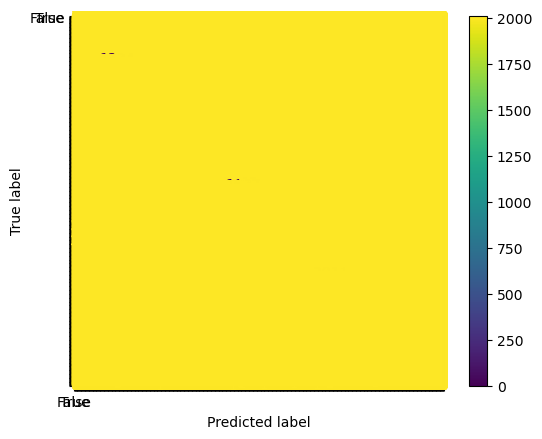

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 
cm_display.plot()
plt.show() 

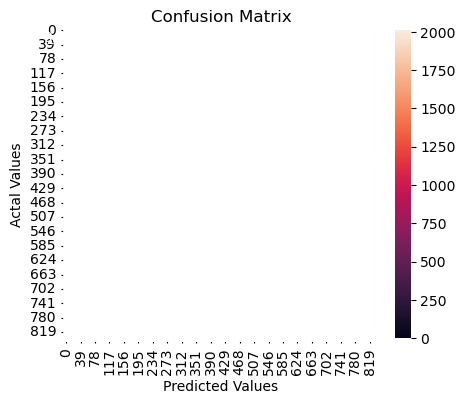

In [26]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [27]:
# import pickle
# s = pickle.dumps(rf_model)
# rf_model_2 = pickle.loads(s)

In [31]:
from joblib import dump, load
dump(lr_model, 'lr_model.joblib') 

['lr_model.joblib']

In [29]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# np.mean(cross_val_score(lr_model, X_train, y_train, cv=5))

In [30]:
gc.collect()

34251915

#TODO Analisar modelo gerado